# Template Matching

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Images

In [2]:
full = cv2.imread('../DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

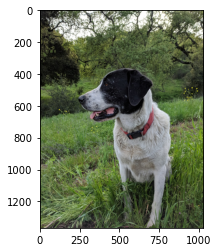

In [3]:
plt.imshow(full)

In [4]:
face = cv2.imread('../DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

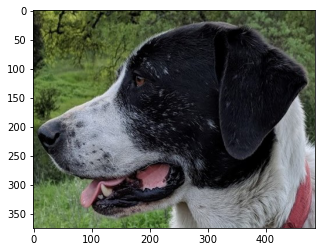

In [5]:
plt.imshow(face)

In [6]:
face.shape

(375, 486, 3)

In [7]:
full.shape

(1367, 1025, 3)

## `eval` function

In [8]:
sum([1, 2, 3])

6

In [9]:
mystring = 'sum'
eval(mystring)

<function sum(iterable, start=0, /)>

In [10]:
myfunc = eval(mystring)

In [11]:
myfunc([1, 2, 3])

6

## Template Matching with Different Methods

In [12]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

In [13]:
result = cv2.matchTemplate(full, face, cv2.TM_CCOEFF)

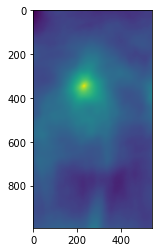

In [14]:
plt.imshow(result)

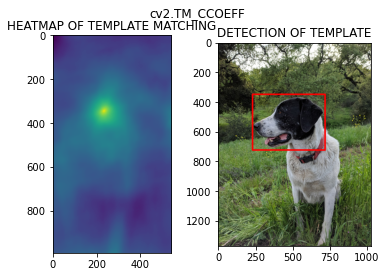

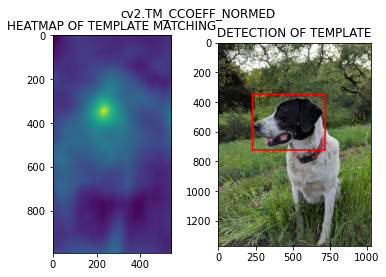

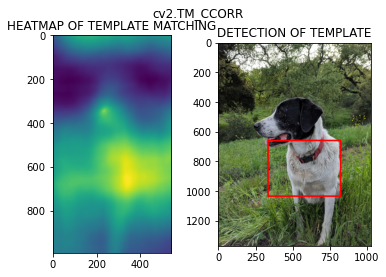

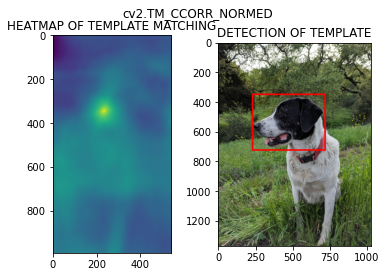

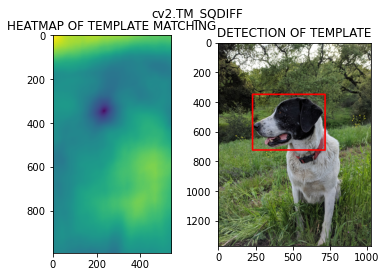

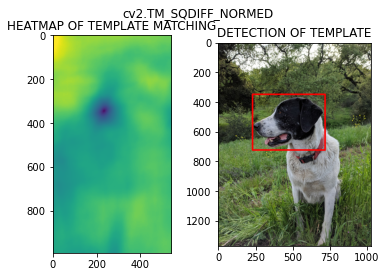

In [15]:
for m in methods:
    full_copy = full.copy()
    
    method = eval(m)
    
    result = cv2.matchTemplate(full_copy, face, method)
    
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
        
    height, width, channel = face.shape
    
    bottom_right = (top_left[0] + width, top_left[1] + height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (255, 0, 0), 10)
    
    plt.subplot(121)
    plt.imshow(result)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    plt.suptitle(m)
    
    plt.show()
    
    print('\n\n')